In [1]:
#Importing the relevant libraries to do the data analysis
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score


# import warnings
import warnings
# ignore warnings
warnings.filterwarnings("ignore")

https://archive.ics.uci.edu/ml/datasets/Power+consumption+of+Tetouan+city

Power consumption of Tetouan city Data Set

Abstract: This dataset is related to power consumption of three different distribution networks 
of Tetouan city which is located in north Morocco. The data has 52,416 energy consumption datapoints
in 10-minute windows beginning at January 1, 2017 (0:00) till 30 December 2017 (23:50). The 3 zone power stations electrify 3 different areas of the city, thus there are 3 target variables.

# Attribute Information:

Date Time: Time duration of ten minutes.

Temperature: Weather Temperature of Tetouan city in degrees Celsius.

Humidity: Weather Humidity of Tetouan city in %.

Wind Speed: Wind Speed of Tetouan city in kmph.

general diffuse flows

diffuse flows

power consumption of zone 1 of Tetouan city in KiloWatts(KW).

power consumption of zone 2 of Tetouan city in KW.

power consumption of zone 3 of Tetouan city in KW.

In [ ]:
#https://towardsdatascience.com/time-series-forecasting-on-power-consumption-273d56768b99
#https://www.kdnuggets.com/2020/01/predict-electricity-consumption-time-series-analysis.html
#https://www.kaggle.com/code/robikscube/time-series-forecasting-with-machine-learning-yt/notebook
#https://www.kaggle.com/code/robikscube/starter-hourly-energy-consumption
#https://towardsdatascience.com/energy-consumption-time-series-forecasting-with-python-and-lstm-deep-learning-model-7952e2f9a796
#https://www.kaggle.com/code/andreshg/timeseries-analysis-a-complete-guide
#https://medium.com/analytics-vidhya/lasso-regression-fundamentals-and-modeling-in-python-ad8251a636cd
#https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/
#https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
#https://medium.com/@data.science.enthusiast/feature-selection-techniques-forward-backward-wrapper-selection-9587f3c70cfa

# Exploratory Data Analysis (EDA)

In [2]:
# read csv (comma separated value) into data
data = pd.read_csv('Tetuan City power consumption.csv')

In [3]:
## to see features and target variable
data.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [4]:
data.tail()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504
52415,12/30/2017 23:50,6.580,74.1,0.081,0.062,0.111,28349.80989,24055.23167,13345.49820


As we see the data, all the datatypes except the datetime datatype are numerical floats, thus
we need to perform the regression supervised technique.

In [5]:
# Trying to find out any null or missing value and the datatypes of the variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


As you can see:

length: 52416 
Features are float but the datetime is in the wrong format, I will change it now

In [6]:
#To find the number of attributes and rows (although we can get the number of rows already from the .info() object above)
data.shape

(52416, 9)

In [7]:
data.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [8]:
from datetime import datetime

In [9]:
#Converting object to datetime datatype

data['DateTime'] = pd.to_datetime(data['DateTime'], errors='coerce') 

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   DateTime                   52416 non-null  datetime64[ns]
 1   Temperature                52416 non-null  float64       
 2   Humidity                   52416 non-null  float64       
 3   Wind Speed                 52416 non-null  float64       
 4   general diffuse flows      52416 non-null  float64       
 5   diffuse flows              52416 non-null  float64       
 6   Zone 1 Power Consumption   52416 non-null  float64       
 7   Zone 2  Power Consumption  52416 non-null  float64       
 8   Zone 3  Power Consumption  52416 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.6 MB


In [11]:
data.tail()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
52411,2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,2017-12-30 23:40:00,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504
52415,2017-12-30 23:50:00,6.580,74.1,0.081,0.062,0.111,28349.80989,24055.23167,13345.49820


In [12]:
#transforming DateTime column into index
data = data.set_index('DateTime')

In [13]:
data.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
DateTime,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


The command data.set_index() is used to substitute the current index with the DateTime column and it
is also convenient to plot the data with respect to the date column.

# Data Visualization

So, data exploration and visualization can be performed to understand the data more.

The heatmap is created using seaborn to observe the correlation between the variables. 
The created correlation matrix shows the single correlation between each feature with other 
features on the dataset. 

If 2 variables are correlated to each other by:

0.0 to 0.3, they are weakly correlated,

0.3 to 0.6, they are moderately correlated,

0.6 to 0.9, they are strongly correlated,

finally, >0.9, they are very strongly correlated


Positive and negative indicates whether the variables are directly or inversely related
e.g. a correlation of -0.7 between 2 variables denote that if one variable increases, the other decreases
strongly (as defined in the list above)

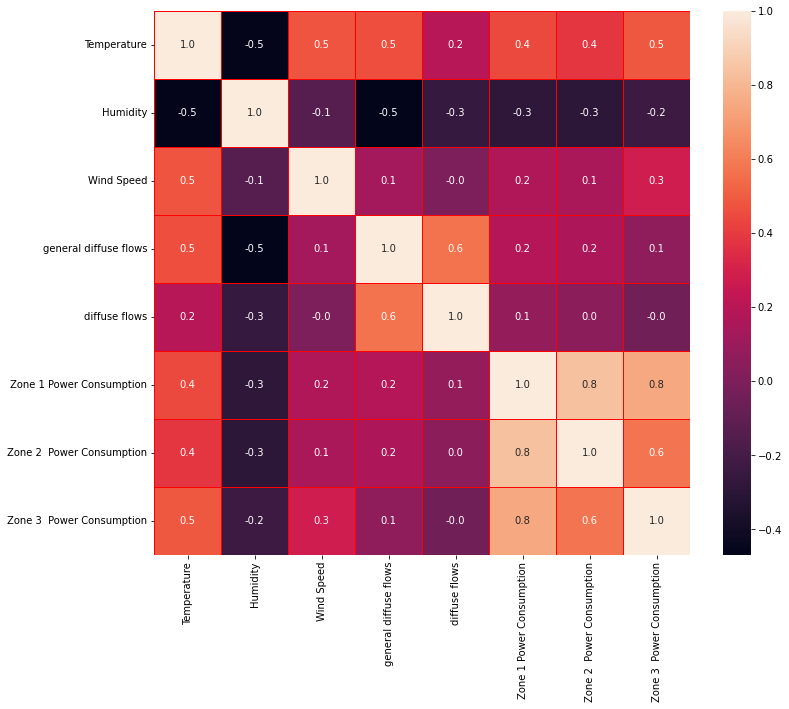

In [15]:
# use plot
f, ax = plt.subplots(figsize = (12,10))
sns.heatmap(data.corr(),
            annot = True,
            linecolor = 'r',
            linewidths = .5,
            fmt = '.1f',
            ax = ax);

The analysis of correlations between the independent and dependent features can be done now:

Temperature is moderately positively correlated to all the power consumptions. 

Although, Humidity, shows a weak negative correlation with the power consumption of all 
three zones.

Zone1, Zone2, and Zone3 Power Consumption zones shows higher correlation values between each other. 
This suggests there are minor differences in the consumption patterns of all the areas, 
and they all seem to increase or decrease together.

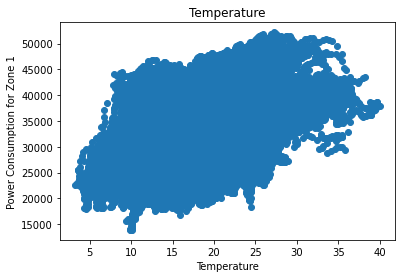

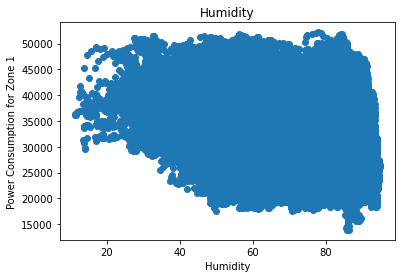

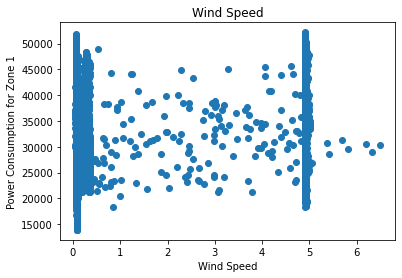

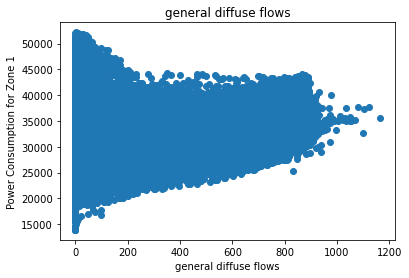

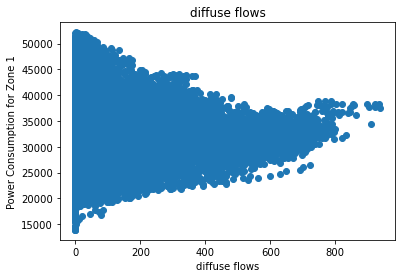

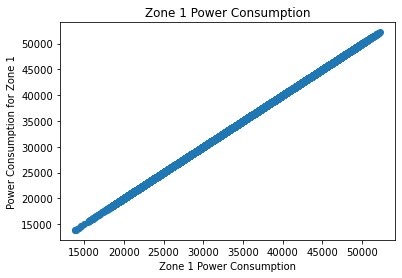

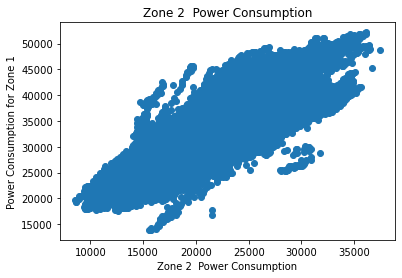

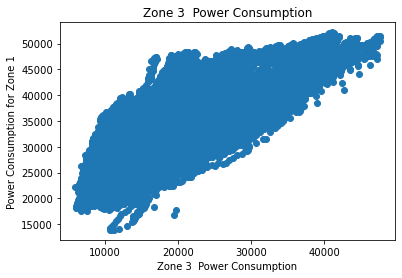

In [16]:
for label in data.columns[:]:
  plt.scatter(data[label], data["Zone 1 Power Consumption"])
  plt.title(label)
  plt.ylabel("Power Consumption for Zone 1")
  plt.xlabel(label)
  plt.show()

Feature Creation

In [14]:
def create_features(df):
    """
    Create time series features like hour, month, year, day, etc. based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(data)

In [15]:
df.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
DateTime,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0,6,1,1,2017,1,1,52
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,0,6,1,1,2017,1,1,52
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,0,6,1,1,2017,1,1,52
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,0,6,1,1,2017,1,1,52
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,0,6,1,1,2017,1,1,52


Visualize our Feature / Target Relationship

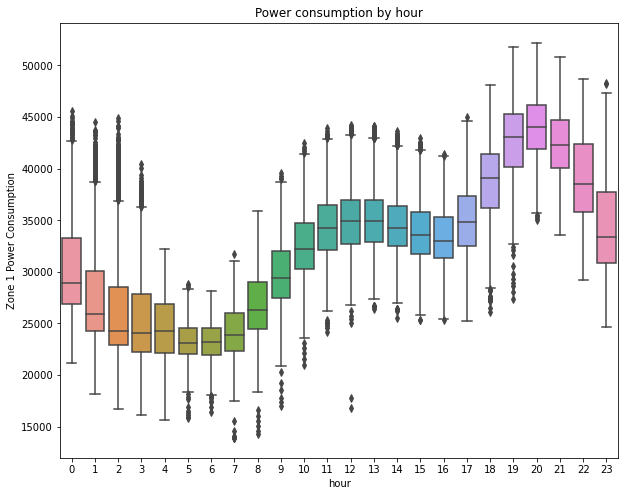

In [19]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='hour', y='Zone 1 Power Consumption')
ax.set_title('Power consumption by hour')
plt.show()

The above set of boxplots shows that the power consumption increases from 8h till 16h which indicates
that individual consumers and businesses (large, medium or small) are using it during working hours.
Moreover, it also rises from 17h till 22h. In certain hours in the morning (0h till 3h), there are a 
lot of outliers in the datapoints as can be observed.

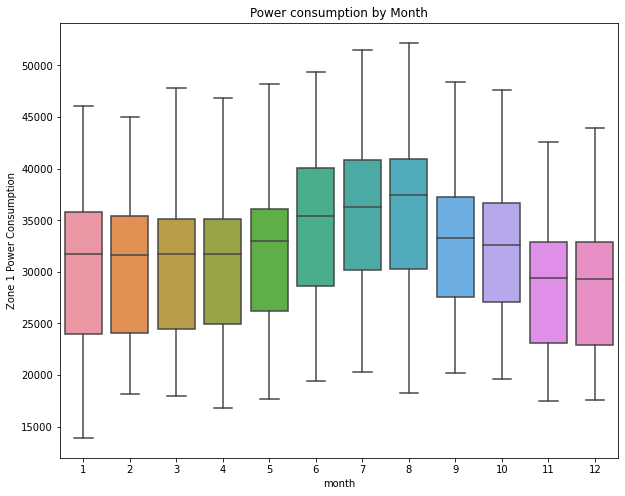

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='Zone 1 Power Consumption')
ax.set_title('Power consumption by Month')
plt.show()

The winter months of January, February, March and April has lower power usage,  November and December even lower than that of the former as shown in the boxplots, and the driest months of June, July, and August has maximum power usage

https://www.whereandwhen.net/when/africa/morocco/tetouan/#:~:text=Tetouan%20has%20dry%20periods%20in,are%20July%2C%20August%20and%20September

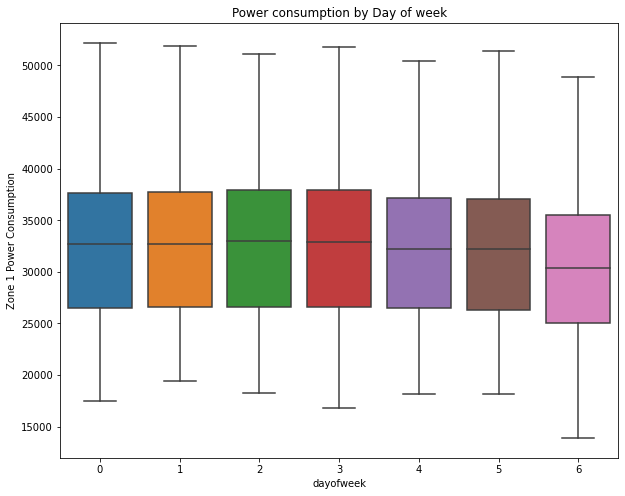

In [21]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='dayofweek', y='Zone 1 Power Consumption')
ax.set_title('Power consumption by Day of week')
plt.show()

Power consumption on all the weekdays remains the same, the sunday is the least consumed for obvious
reasons, same goes for saturday.

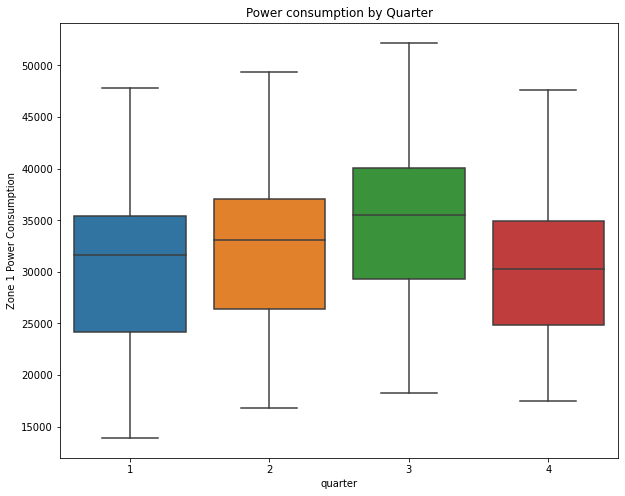

In [22]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='quarter', y='Zone 1 Power Consumption')
ax.set_title('Power consumption by Quarter')
plt.show()

This can be well explained in syncronization with the 'month' column as explained above, the summer months or the 3rd quarter consumes the most of the power, and the 1st and 4th quarter has the least power consumption range.

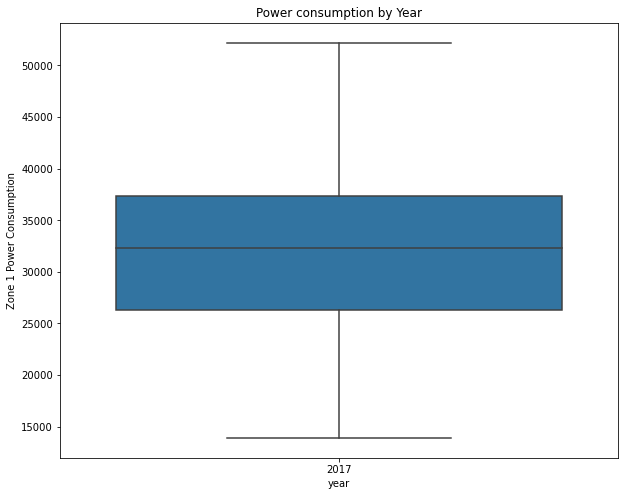

In [23]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='year', y='Zone 1 Power Consumption')
ax.set_title('Power consumption by Year')
plt.show()

# Machine Learning modeling using Regression techniques

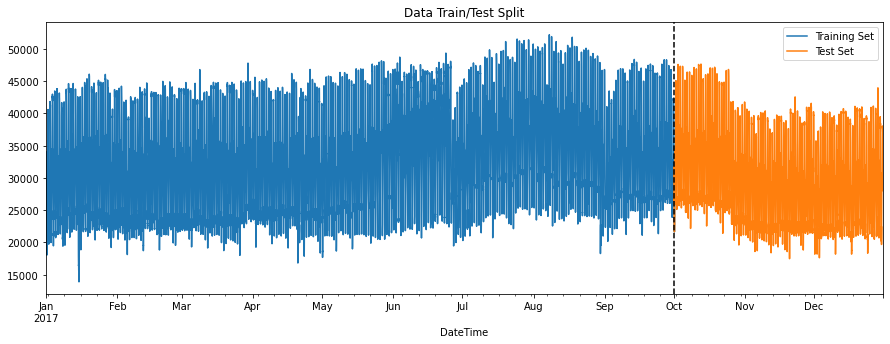

In [20]:
train_data = df.loc[:'10-01-2017',['Zone 1 Power Consumption']]

test_data = df.loc['10-01-2017':, ['Zone 1 Power Consumption']]

fig, ax = plt.subplots(figsize=(15, 5))
train_data.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test_data.plot(ax=ax, label='Test Set')
ax.axvline('10-01-2017', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

I have only considered the Zone 1 Power Consumption values to test with different regression models 
and also the other zones power consumption values does not vary drastically from the Zone 1 as we can
find from the correlation heat map, so it wont make a big difference.


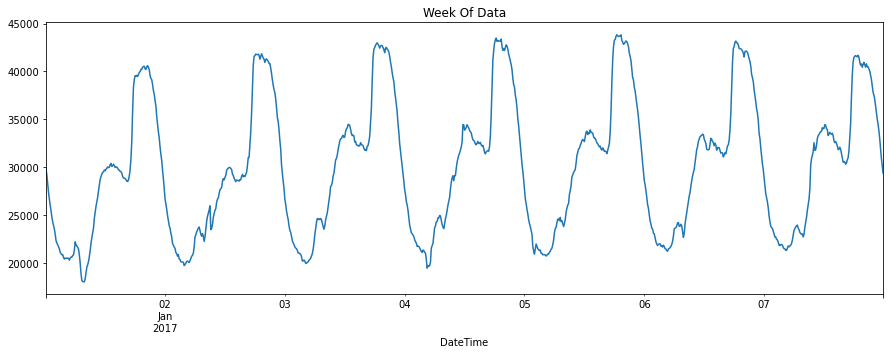

In [25]:
data['Zone 1 Power Consumption'].loc[(data.index > '01-01-2017') & (data.index < '01-08-2017')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

Create the train and test datasets using the create_features function

In [21]:
train = create_features(train_data)
test = create_features(test_data)

In [46]:
train

,Zone 1 Power Consumption,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
DateTime,,,,,,,,,
2017-01-01 00:00:00,34055.69620,0,6,1,1,2017,1,1,52
2017-01-01 00:10:00,29814.68354,0,6,1,1,2017,1,1,52
2017-01-01 00:20:00,29128.10127,0,6,1,1,2017,1,1,52
2017-01-01 00:30:00,28228.86076,0,6,1,1,2017,1,1,52
2017-01-01 00:40:00,27335.69620,0,6,1,1,2017,1,1,52
...,...,...,...,...,...,...,...,...,...
2017-10-01 23:10:00,34225.99562,23,6,4,10,2017,274,1,39
2017-10-01 23:20:00,33450.85339,23,6,4,10,2017,274,1,39
2017-10-01 23:30:00,32543.36980,23,6,4,10,2017,274,1,39


In [22]:
#defining input and target variable
X_train = df.loc[:'10-01-2017',['Temperature', 'dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']]
y_train = df.loc[:'10-01-2017', ['Zone 1 Power Consumption']]
X_test = df.loc['10-01-2017':,['Temperature', 'dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']]
y_test = df.loc['10-01-2017':, ['Zone 1 Power Consumption']]

In [55]:
y_train

,Zone 1 Power Consumption
DateTime,
2017-01-01 00:00:00,34055.69620
2017-01-01 00:10:00,29814.68354
2017-01-01 00:20:00,29128.10127
2017-01-01 00:30:00,28228.86076
2017-01-01 00:40:00,27335.69620
...,...
2017-10-01 23:10:00,34225.99562
2017-10-01 23:20:00,33450.85339
2017-10-01 23:30:00,32543.36980


Test with different ML algos (Linear regression, decision tree, random forest, xgboost, svm, 
                              neural nets, etc.)
and then check which has the best RMSE score and the worst RMSE score
Since the data is already stationary, we do not need to go through ARIMA based models

# Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
lr_regressor = LinearRegression()
lr_regressor.fit(X_train, y_train)

LinearRegression()

In [54]:
from sklearn.model_selection import TimeSeriesSplit
ts_cross_val = TimeSeriesSplit(n_splits=5)

In [55]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(lr_regressor, X_train, y_train, cv = ts_cross_val, scoring= "neg_mean_squared_error")

In [56]:
cv

array([-15450011.7276325 , -18233479.78225744, -40552173.75278795,
       -26155306.2365301 , -26332150.6505266 ])

In [24]:
test['lr_prediction'] = lr_regressor.predict(X_test)

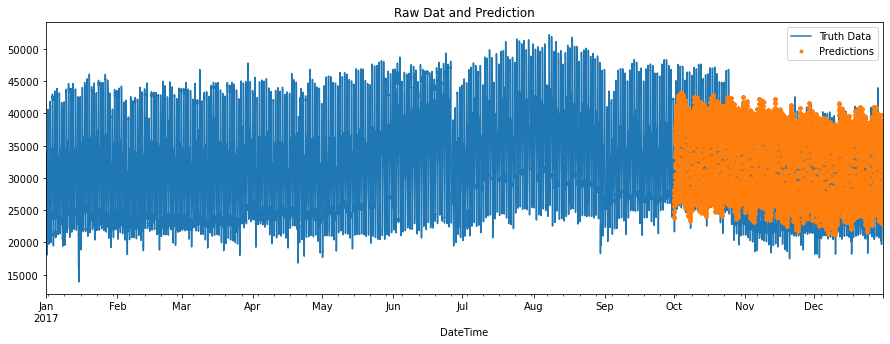

In [25]:
df = data.merge(test[['lr_prediction']], how='left', left_index=True, right_index=True)
ax = df[['Zone 1 Power Consumption']].plot(figsize=(15, 5))
df['lr_prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

In [26]:

np.sqrt(mean_squared_error(y_test,test['lr_prediction']))

4424.117538034905

# Decision Tree Regressor

In [65]:
from sklearn.tree import DecisionTreeRegressor 
# create a regressor object
dtregressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
dtregressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [66]:
test['dt_prediction'] = dtregressor.predict(X_test)

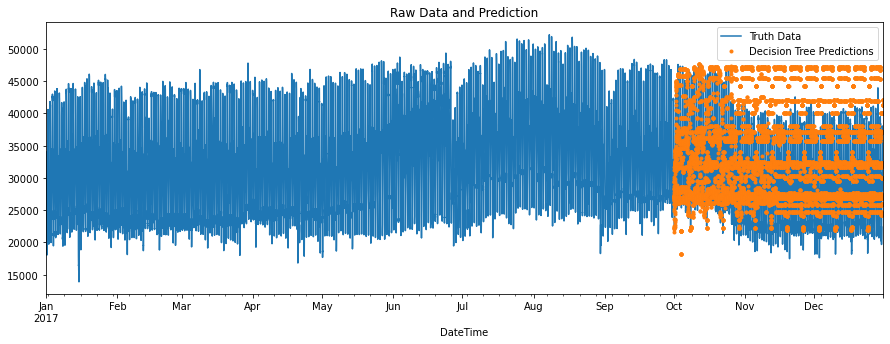

In [67]:
df = data.merge(test[['dt_prediction']], how='left', left_index=True, right_index=True)
ax = df[['Zone 1 Power Consumption']].plot(figsize=(15, 5))
df['dt_prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Decision Tree Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

In [68]:
np.sqrt(mean_squared_error(y_test,test['dt_prediction']))

4374.375344350009

# Support Vector Regressor

In [69]:
from sklearn.svm import SVR
svrregressor = SVR(kernel = 'rbf')
# fit the regressor with X and Y data
svrregressor.fit(X_train, y_train)

SVR()

In [70]:
test['svr_prediction'] = svrregressor.predict(X_test)

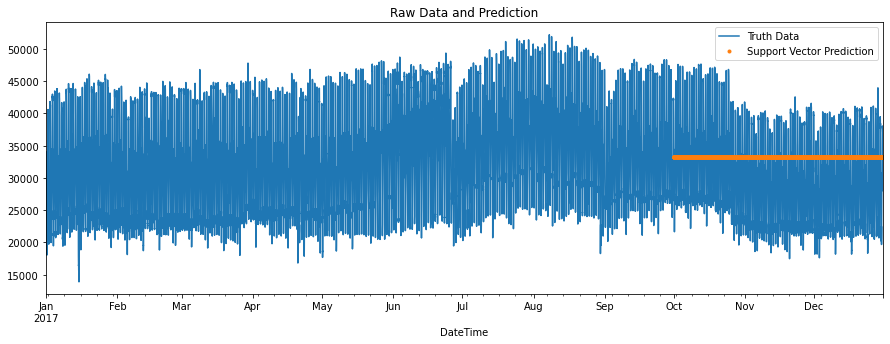

In [71]:
df = data.merge(test[['svr_prediction']], how='left', left_index=True, right_index=True)
ax = df[['Zone 1 Power Consumption']].plot(figsize=(15, 5))
df['svr_prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Support Vector Prediction'])
ax.set_title('Raw Data and Prediction')
plt.show()

In [72]:
np.sqrt(mean_squared_error(y_test,test['svr_prediction']))

7070.293564422961

# XGBoost Regressor

In [31]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

xgbreg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1500,
                       early_stopping_rounds=50,
                       objective='reg:squarederror',
                       max_depth=6,
                       learning_rate=0.03, 
                       random_state = 48)
xgbreg.fit(X_train, y_train,         
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:32789.45325	validation_1-rmse:29967.21144
[100]	validation_0-rmse:2234.43648	validation_1-rmse:3089.44044
[132]	validation_0-rmse:1602.32304	validation_1-rmse:3485.78564


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.03, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1500,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=48,
             reg_alpha=0, reg_lambda=1, ...)

In [32]:
test['xgb_prediction'] = xgbreg.predict(X_test)

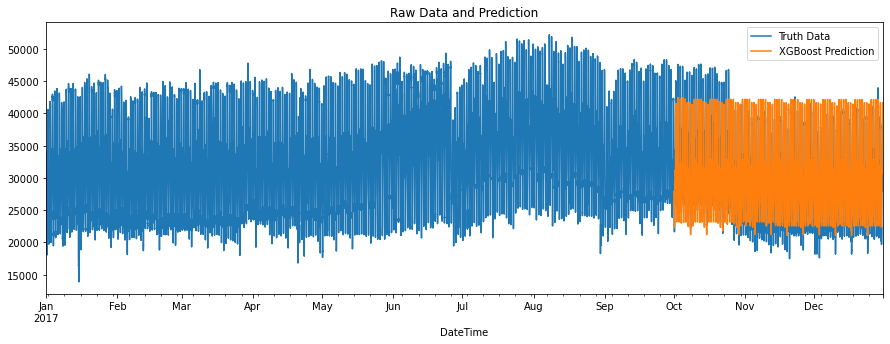

In [33]:
df = data.merge(test[['xgb_prediction']], how='left', left_index=True, right_index=True)
ax = df[['Zone 1 Power Consumption']].plot(figsize=(15, 5))
df['xgb_prediction'].plot(ax=ax, style='-')
plt.legend(['Truth Data', 'XGBoost Prediction'])
ax.set_title('Raw Data and Prediction')
plt.show()

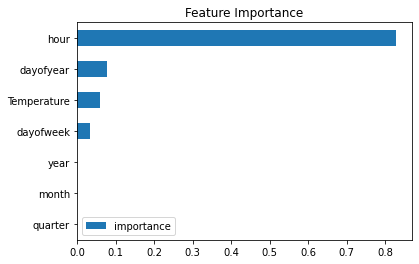

In [34]:
fi = pd.DataFrame(data=xgbreg.feature_importances_,
             index=xgbreg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [35]:
np.sqrt(mean_squared_error(y_test,test['xgb_prediction']))

2864.696788702444

In [36]:
mean_squared_error(y_test,test['xgb_prediction'])

8206487.691202095

In [37]:
mean_absolute_error(y_test, test['xgb_prediction'])

2249.2838201476648

In [38]:
r2_score(y_test, test['xgb_prediction'])

0.8030954981023273

# Random Forest Regressor

In [40]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
rf_regressor.fit(X_train, y_train)  

RandomForestRegressor(random_state=0)

In [41]:
test['rf_prediction'] = rf_regressor.predict(X_test)

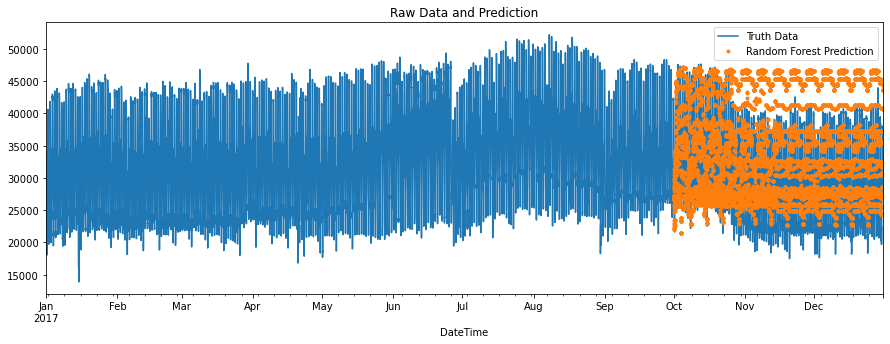

In [42]:
df = data.merge(test[['rf_prediction']], how='left', left_index=True, right_index=True)
ax = df[['Zone 1 Power Consumption']].plot(figsize=(15, 5))
df['rf_prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Random Forest Prediction'])
ax.set_title('Raw Data and Prediction')
plt.show()

In [43]:
np.sqrt(mean_squared_error(y_test,test['rf_prediction']))

4125.6740679572

In [44]:
r2_score(y_test, test['rf_prediction'])

0.5915977238302079

# KNN Regressor

In [82]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt



In [83]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    knn_regressor = neighbors.KNeighborsRegressor(n_neighbors = K)

    knn_regressor.fit(X_train, y_train)  #fit the model
    test['knn_prediction'] = knn_regressor.predict(X_test)#make prediction on test set
     
    error = sqrt(mean_squared_error(y_test,test['knn_prediction'])) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 5268.162522917235
RMSE value for k=  2 is: 5070.024852068744
RMSE value for k=  3 is: 5025.4812997461095
RMSE value for k=  4 is: 4961.367010597567
RMSE value for k=  5 is: 4885.746053834857
RMSE value for k=  6 is: 4922.900335364985
RMSE value for k=  7 is: 4935.701176045525
RMSE value for k=  8 is: 4923.282561602619
RMSE value for k=  9 is: 4911.726057790451
RMSE value for k=  10 is: 4876.83690515796
RMSE value for k=  11 is: 4834.263091342795
RMSE value for k=  12 is: 4809.258860751904
RMSE value for k=  13 is: 4782.225539635729
RMSE value for k=  14 is: 4773.698174528687
RMSE value for k=  15 is: 4749.214927847499
RMSE value for k=  16 is: 4727.100195702451
RMSE value for k=  17 is: 4707.92416359461
RMSE value for k=  18 is: 4680.737149955515
RMSE value for k=  19 is: 4640.230058811747
RMSE value for k=  20 is: 4615.023438777863


<AxesSubplot:>

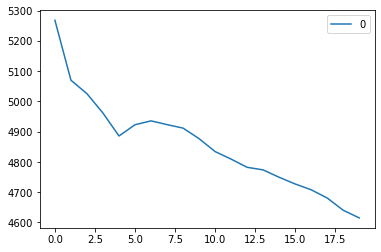

In [84]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [85]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 9}

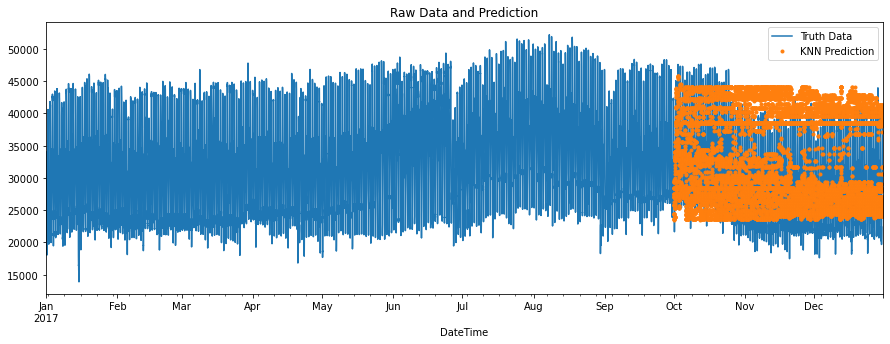

In [86]:
df = data.merge(test[['knn_prediction']], how='left', left_index=True, right_index=True)
ax = df[['Zone 1 Power Consumption']].plot(figsize=(15, 5))
df['knn_prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'KNN Prediction'])
ax.set_title('Raw Data and Prediction')
plt.show()

In [87]:
np.sqrt(mean_squared_error(y_test,test['knn_prediction']))

4615.023438777863

In [ ]:
#Lasso and ridge regressor

# Lasso and Ridge Regressor

In [88]:

from sklearn.linear_model import RidgeCV, LassoCV


In [89]:
lasso_model = Lasso().fit(X_train,y_train)

In [90]:
lasso_model.intercept_

array([19371.1270739])

In [91]:
lasso_model.coef_

array([ 315.6977491 ,   19.36053654,  707.11110651, -236.53903115,
         95.81870562, -549.40593163,    0.        ])

In [60]:
# Coefficients for different lambda values.

lasso = Lasso()
coefs = []
alphas = np.random.randint(0,1000,100)

# 10**np.linspace(10,-2,100)*0.5 -- It can be used instead of alphas and observed.

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train,y_train)
    coefs.append(lasso.coef_)

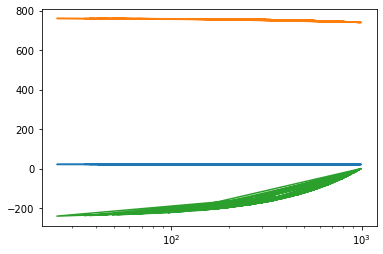

In [61]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")

In [92]:
test['lasso_reg_prediction'] = lasso_model.predict(X_test)

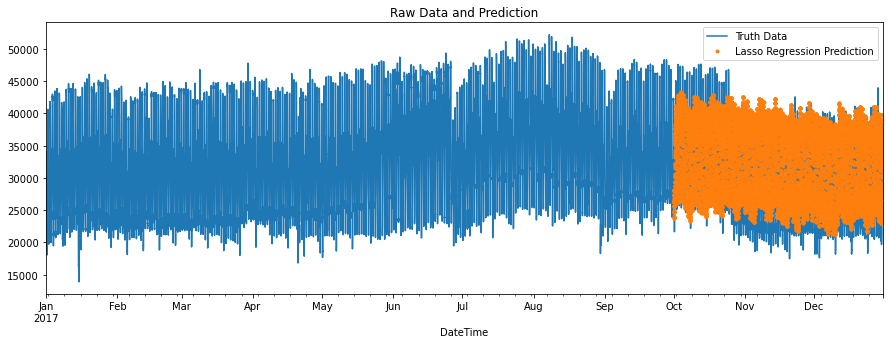

In [93]:
df = data.merge(test[['lasso_reg_prediction']], how='left', left_index=True, right_index=True)
ax = df[['Zone 1 Power Consumption']].plot(figsize=(15, 5))
df['lasso_reg_prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Lasso Regression Prediction'])
ax.set_title('Raw Data and Prediction')
plt.show()

In [94]:
np.sqrt(mean_squared_error(y_test,test['lasso_reg_prediction']))

4420.122501392826

In [122]:
r2_score(y_test, test['lasso_reg_prediction'])

-0.48911045490261085

Model Tuning

In [95]:
lasso_cv_model = LassoCV(alphas = np.random.randint(0,1000,100), cv = 10, max_iter = 100000).fit(X_train,y_train)

In [96]:
lasso_cv_model.alpha_

68

In [97]:
lasso_tuned = Lasso().set_params(alpha = lasso_cv_model.alpha_).fit(X_train,y_train)

y_pred_tuned = lasso_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test,y_pred_tuned))

4446.603304238964

In [98]:
# We know that the coefficients not used in Lasso Regression are set to zero. So let's observe.

pd.Series(lasso_tuned.coef_, index = X_train.columns )

Temperature    312.750498
dayofyear        2.574273
hour           706.217216
dayofweek     -221.484101
quarter         -0.000000
month           -0.000000
year             0.000000
dtype: float64

# Hyperparameter Tuning

In [27]:
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
#https://www.kaggle.com/code/felipefiorini/xgboost-hyper-parameter-tuning#5.-Fit-Models
#https://towardsdatascience.com/xgboost-fine-tune-and-optimize-your-model-23d996fab663

In [100]:
#XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [85]:
hyperParameterTuning(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


{'colsample_bytree': 0.7,
 'learning_rate': 0.01,
 'max_depth': 5,
 'min_child_weight': 3,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.5}

In [28]:
xgb_model = XGBRegressor(
        objective= 'reg:squarederror',
        colsample_bytree= 0.7,
        learning_rate= 0.01,
        max_depth= 5,
        min_child_weight= 3,
        n_estimators= 500,
        subsample= 0.5)

# %time xgb_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_val, y_val)], verbose=False)
xgb_model.fit(X_train,y_train)
test['xgb_hyp_params_prediction'] = xgb_model.predict(X_test)


#mae_xgb = mean_absolute_error(y_test, test['xgb_hyp_params_prediction'])
np.sqrt(mean_squared_error(y_test,test['xgb_hyp_params_prediction']))



3179.26852511219

In [29]:
np.sqrt(mean_squared_error(y_test,test['xgb_hyp_params_prediction']))

3179.26852511219

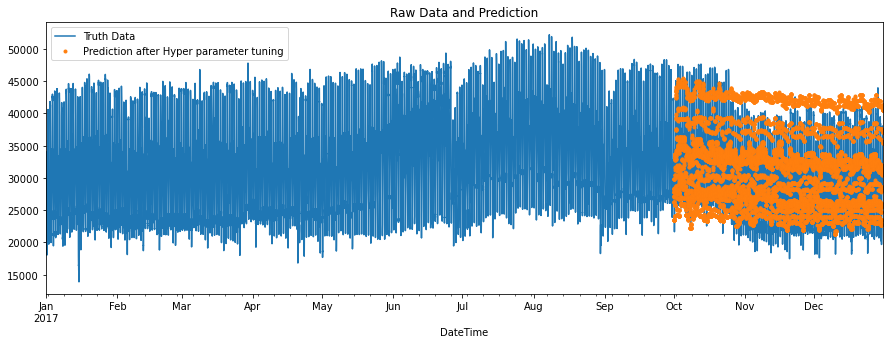

In [30]:
df = data.merge(test[['xgb_hyp_params_prediction']], how='left', left_index=True, right_index=True)
ax = df[['Zone 1 Power Consumption']].plot(figsize=(15, 5))
df['xgb_hyp_params_prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Prediction after Hyper parameter tuning'])
ax.set_title('Raw Data and Prediction')
plt.show()

In [39]:
r2_score(y_test, test['xgb_hyp_params_prediction'])

0.75747710470138